# One-minute dataset overview



In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import os

base_path = os.path.expanduser('/home/michael/projects/engaged_hackathon_data/one_minute_files/')
dataset_csv = csv.reader(open(base_path + 'urban_sounds_labels.csv'))

annotations = []  # list of all class info

def try_number(s):
    try:
        return float(s)
    except ValueError:
        return s

# I'm basically reinventing pandas here - very silly
for count, line in enumerate(dataset_csv):
    if count == 0:
        header = line
        continue
        
    annotation = {label:try_number(item) for label, item in zip(header, line)}    
    annotation['length'] = \
        annotation['LabelEndTime_Seconds'] - annotation['LabelStartTime_Seconds']
    annotation['Label'] = annotation['Label'].strip().lower()
    annotations.append(annotation)

In [67]:
# Event types
# Plot histogram of number of occurances of each type of event (this is the same as the 4 second clips)
labels = [annotation['Label'] for annotation in annotations]
import collections
print collections.Counter(labels)

Counter({'bird': 4798, 'mix traffic': 1545, 'braking': 688, 'rain': 341, 'voices': 329, 'unknown sound': 240, 'electrical': 235, 'anthropogenic unknown': 159, 'wing beats': 66, 'airplane': 63, 'dog bark': 58, 'beep': 55, 'bat': 48, 'metal': 29, 'bus emitting': 18, 'fox': 17, 'footsteps': 13, 'mower': 12, 'whistle': 12, 'grey squirrel': 11, 'siren': 7, 'coughing': 7, 'invertebrate': 7, 'music': 3, 'horn': 1, 'startthecar': 1, 'bells': 1, 'applause': 1})


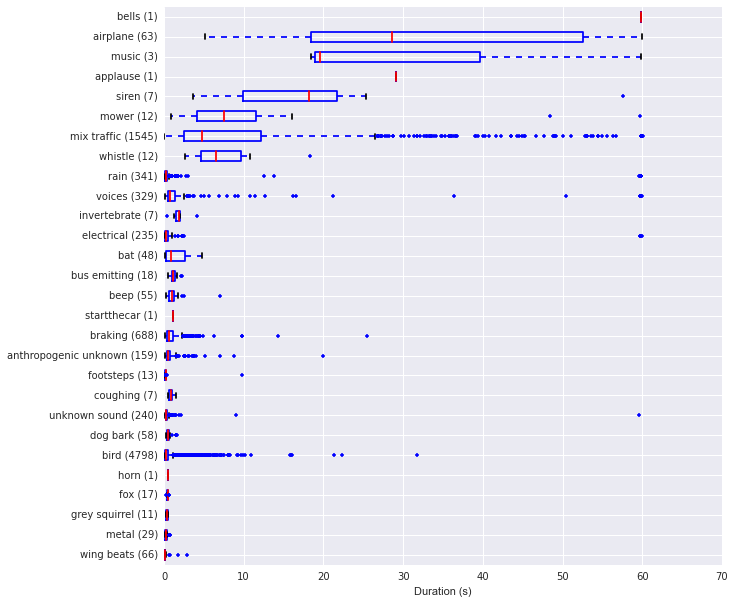

In [69]:
# plotting lengths of each event type
import seaborn as sns

lengths_dict = collections.defaultdict(list)
for annotation in annotations:
    lengths_dict[annotation['Label']].append(annotation['length'])
    
# accumualting into list
lengths = []
labels = []
for label, lengthlist in lengths_dict.iteritems():
    lengths.append(lengthlist)
    labels.append(label + ' (' + str(len(lengthlist)) + ')')

# sort
means = np.array([np.array(length).mean() for length in lengths])
idxs = np.argsort(means)
lengths = [lengths[idx] for idx in idxs]
labels = [labels[idx] for idx in idxs]
    
# boxplot
plt.figure(figsize=(10, 10))
plt.boxplot(lengths, 0, 'b.', 0)
plt.gca().set_yticklabels(labels)
# plt.hist(lengths, 50);

plt.xlabel('Duration (s)')

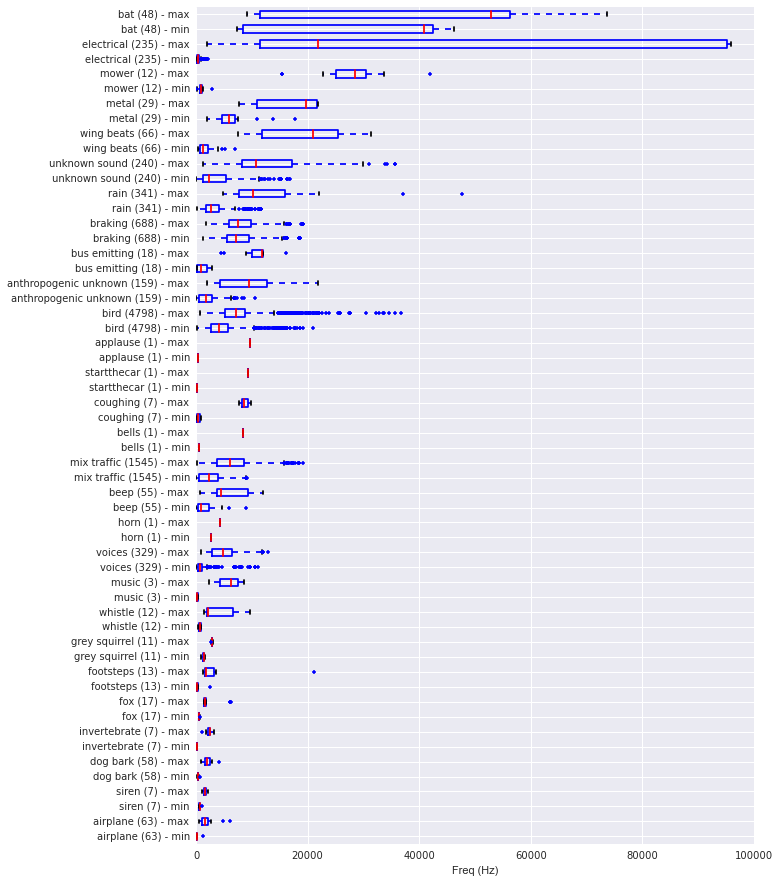

In [80]:

min_freqs = collections.defaultdict(list)
max_freqs = collections.defaultdict(list)
mid_freqs = collections.defaultdict(list)

for annotation in annotations:
    min_freqs[annotation['Label']].append(annotation['MinimumFreq_Hz'])
    max_freqs[annotation['Label']].append(annotation['MaximumFreq_Hz'])
    mid_freq = (annotation['MinimumFreq_Hz'] + annotation['MaximumFreq_Hz']) / 2.0
    mid_freqs[annotation['Label']].append(mid_freq)
    
# accumualting into list
lengths = []
labels = []
mids = []
for label, lengthlist in lengths_dict.iteritems():
    lengths.append(min_freqs[label])
    labels.append(label + ' (' + str(len(lengthlist)) + ') - min')
    
    lengths.append(max_freqs[label])
    labels.append(label + ' (' + str(len(lengthlist)) + ') - max')

    mids.append(lengthlist)
    
# sort
means = np.array([np.array(mid).mean() for mid in mids])
idxs = np.argsort(means)

lengths2, labels2 = [], []
for idx in idxs:
    lengths2.append(lengths[2*idx])
    lengths2.append(lengths[2*idx + 1])
    labels2.append(labels[2*idx])
    labels2.append(labels[2*idx + 1])

# boxplot
plt.figure(figsize=(10, 15))
plt.boxplot(lengths2, 0, 'b.', 0)
plt.gca().set_yticklabels(labels2)
# plt.hist(lengths, 50);

plt.xlabel('Freq (Hz)')